Cloud notebook voor het maken van een onafhankelijke Bitcoin Fundamentals chart (nu in Tradingview)

In [ ]:
!pip3 install yfinance

     |████████████████████████████████| 6.3 MB 9.9 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=356c7ab549ebbc17d894a86c916f8a24814e75072aeea5256375c99d6748a41e
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
!pip3 install mplfinance

     |████████████████████████████████| 62 kB 726 kB/s 


In [ ]:
!pip3 install pandas_ta

     |████████████████████████████████| 115 kB 8.2 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=817cf80796eb88d1d28171fd591974604ebd293594aa5a0a75733fb18aea9833
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [ ]:
import pandas as pd
import yfinance as yf
import mplfinance as mpf
import pandas_ta as pta

In [ ]:
df = yf.download('BTC-USD', '2014-01-01')
df.to_csv('btc-yahoo-yfinance-data.csv')
df = pd.read_csv('btc-yahoo-yfinance-data.csv',index_col=0,parse_dates=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.shape

(2550, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2550 entries, 2014-09-17 to 2021-09-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2550 non-null   float64
 1   High       2550 non-null   float64
 2   Low        2550 non-null   float64
 3   Close      2550 non-null   float64
 4   Adj Close  2550 non-null   float64
 5   Volume     2550 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 139.5 KB


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2021-09-09,45774.742188,47261.949219,45669.738281,46391.421875,46391.421875,38672657013
2021-09-10,46396.664062,47031.742188,44344.484375,44883.910156,44883.910156,39154666597
2021-09-11,44869.839844,45969.292969,44818.265625,45201.457031,45201.457031,34499835245


Omdat Date nu een index is, kan er later geen plot met dates van gemaakt worden volgens mij. Hieronder het commando om de index te resetten naar een 'line number'.

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2545,2021-09-09,45774.742188,47261.949219,45669.738281,46391.421875,46391.421875,38672657013
2546,2021-09-10,46396.664062,47031.742188,44344.484375,44883.910156,44883.910156,39154666597
2547,2021-09-11,44869.839844,45969.292969,44818.265625,45201.457031,45201.457031,34499835245
2548,2021-09-12,45206.628906,46364.878906,44790.460938,46063.269531,46063.269531,27881980161


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2550 non-null   datetime64[ns]
 1   Open       2550 non-null   float64       
 2   High       2550 non-null   float64       
 3   Low        2550 non-null   float64       
 4   Close      2550 non-null   float64       
 5   Adj Close  2550 non-null   float64       
 6   Volume     2550 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 139.6 KB


Maken van de moving averages voor de Bitcoin fundamentals chart

In [ ]:
# Calculate moving averages
df['sma21'] = pta.sma(df["Close"], length=21)
df['ema21'] = pta.ema(df["Close"], length=21)
df['sma50'] = pta.sma(df["Close"], length=50)
df['sma100'] = pta.sma(df["Close"], length=100)
df['sma200'] = pta.sma(df["Close"], length=200)
df['wsma20'] = pta.sma(df["Close"], length=140)
df['wsma200'] = pta.sma(df["Close"], length=1400)
df['y2lowsma'] = pta.sma(df["Close"], length=730)
df['y2highsma'] = df['y2lowsma'] * 5

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,sma21,ema21,sma50,sma100,sma200,wsma20,wsma200,y2lowsma,y2highsma
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,2021-09-09,45774.742188,47261.949219,45669.738281,46391.421875,46391.421875,38672657013,48740.943080,47955.153434,44699.063516,39652.692422,46001.664199,41907.354911,15284.706857,22236.591710,111182.958550
2546,2021-09-10,46396.664062,47031.742188,44344.484375,44883.910156,44883.910156,39154666597,48528.787574,47675.949500,44950.479609,39725.779727,45955.047148,41862.999609,15311.750536,22283.669320,111418.346599
2547,2021-09-11,44869.839844,45969.292969,44818.265625,45201.457031,45201.457031,34499835245,48352.404948,47450.995639,45182.877734,39785.706641,45936.932305,41828.360965,15338.934162,22331.286006,111656.430029
2548,2021-09-12,45206.628906,46364.878906,44790.460938,46063.269531,46063.269531,27881980161,48197.243862,47324.838720,45418.294219,39877.395273,45918.721992,41807.353934,15366.508148,22380.228875,111901.144377


Proberen de eerste charts te plotten met deze gegevens

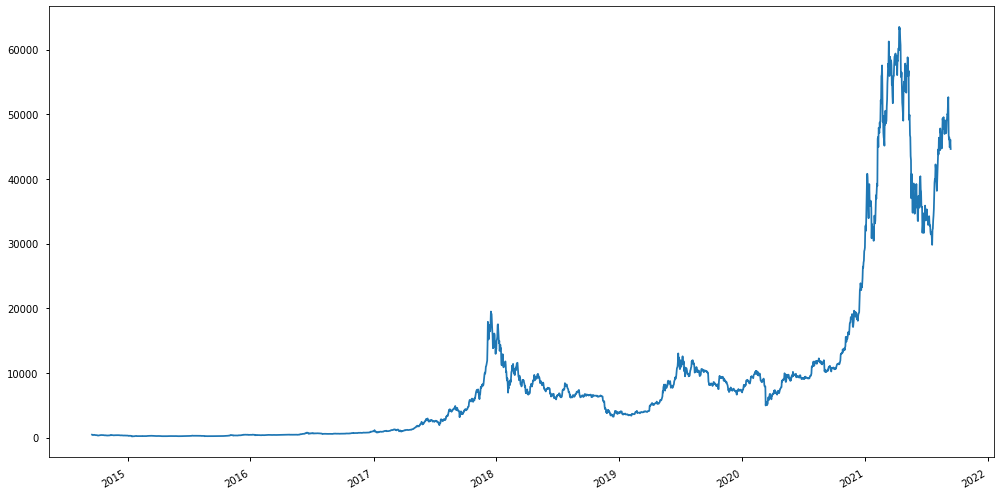

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn-notebook')
plt.figure(figsize=(14,7))

df['Date'] = pd.to_datetime(df['Date'])
# df.sort_values(df['Date'], inplace=True)

dates = df['Date']
price = df['Close']

plt.plot_date(dates, price, linestyle='solid', marker=None)

plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

## Indicatoren

De initiele chart werkt! Nu extra indicatoren toevoegen.

###Toelichting

**Bull market support band**  
Combination of 21 SMA and 21 EMA. When price is above support band, be bullish. When price is below band, be bearish. Plain and simple.

**50 / 200 day SMA**  
The combination of 50 day SMA and 200 day SMA should be used to determine if BTC is in a bear market (50 below 200 SMA) or in a bull market (50 above 200 SMA).
Also, When price is above 200 SMA be optimistic. When price is below 200 SMA, be pessimistic.

**Bitcoin investor lines**  
The green and red bands are used in combination and are inspired by the Bitcoin investor tool (https://www.lookintobitcoin.com/charts/bitcoin-investor-tool/). When price is below the green line, it indicates an DCA accumulation phase. When price is above the red line, DCA selling opportunities are available. You should HODL your bitcoin between these lines.

**200 Weekly SMA**  
Ultimate bottom of the bitcoin price. When prices hit these levels, the bottom of the bear market should be reached. Be carefull because only the bear market of 2017 has reached this. Also the Corona black swan event bottomed (and further) at these levels. Should be investigated more!

**Mayer multiple line**  
There is the Mayer multiple (https://mayermultiple.info/). This line indicates if Bitcoin price has been overextended in comparison with the 200 day SMA. If so, selling opportunities arise because overextension will mostly lead to retracement to the 200 day SMA.

**PI Cycle bitcoin top indicator**  
The Pi Cycle Top Indicator has historically been effective in picking out the timing of market cycle highs to within 3 days. It uses the 111 day moving average (111DMA) and a newly created multiple of the 350 day moving average, the 350DMA x 2.  
Note: The multiple is of the price values of the 350DMA not the number of days. For the past three market cycles, when the 111DMA moves up and crosses the 350DMA x 2 we see that it coincides with the price of Bitcoin peaking. It is also interesting to note that 350 / 111 is 3.153, which is very close to Pi = 3.142. In fact, it is the closest we can get to Pi when dividing 350 by another whole number. It once again demonstrates the cyclical nature of Bitcoin price action over long time frames. Though in this instance it does so with a high degree of accuracy over the past 7 years.  
How It Can Be Used : Pi Cycle Top is useful to indicate when the market is very overheated. So overheated that the shorter term moving average, which is the 111 day moving average, has reached a x2 multiple of the 350 day moving average. Historically it has proved advantageous to sell Bitcoin at this time in Bitcoin's price cycles.

Berekenen van Moving averages

    Bullmarkt support band (21 SMA & 21 EMA cross)
    50 SMA
    100 SMA
    200 SMA
    Bear/Bull market cross (golden cross 50 SMA > 200 SMA / death cross 50 SMA < 200 SMA)
    20 Weekly SMA (140 days SMA (20 * 7 days))
    2 Year Low SMA (730 days SMA (2 * 365 days)) - Price below is accumulation phase (DCA buy)
    2 Year high SMA (= 730 SMA * 5) - Price above is distribution phase (DCA sell)
    200 weekly SMA (1400 days SMA (200 * 7 days))



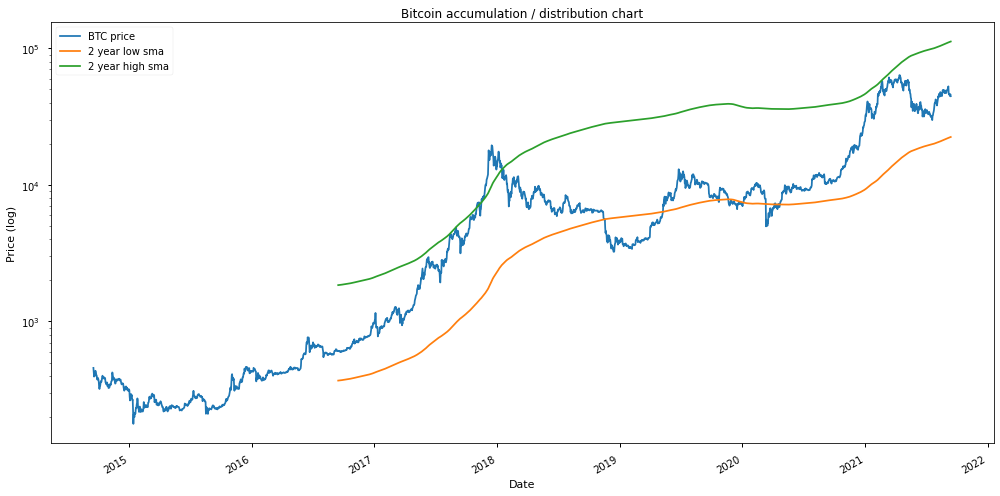

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn-notebook')
plt.figure(figsize=(14,7))

df['Date'] = pd.to_datetime(df['Date'])
# df.sort_values(df['Date'], inplace=True)

dates = df['Date']
price = df['Close']
y2lowsma = df['y2lowsma']
y2highsma = df['y2highsma']

# df['sma21'] = pta.sma(df["Close"], length=21)
# df['ema21'] = pta.ema(df["Close"], length=21)
# df['sma50'] = pta.sma(df["Close"], length=50)
# df['sma100'] = pta.sma(df["Close"], length=100)
# df['sma200'] = pta.sma(df["Close"], length=200)
# df['wsma20'] = pta.sma(df["Close"], length=140)
# df['wsma200'] = pta.sma(df["Close"], length=1400)
# df['y2lowsma'] = pta.sma(df["Close"], length=730)
# df['y2highsma'] = df['y2lowsma'] * 5

# Adding lines
plt.plot_date(dates, price, linestyle='solid', marker=None, label='BTC price')
plt.plot(dates, y2lowsma, label='2 year low sma')
plt.plot(dates, y2highsma, label='2 year high sma')

# Create log chart
plt.yscale('log')

plt.gcf().autofmt_xdate()

plt.title('Bitcoin accumulation / distribution chart')
plt.xlabel('Date')
plt.ylabel('Price (log)')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

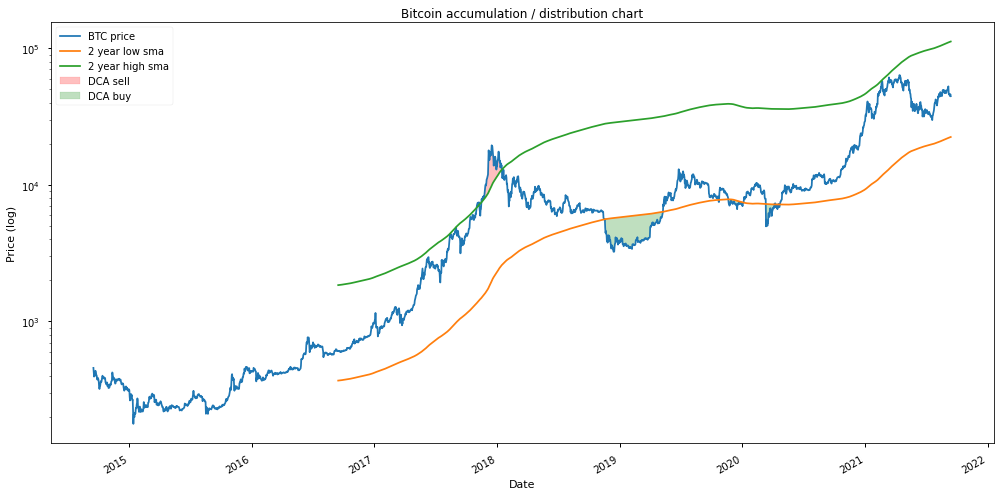

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn-notebook')
plt.figure(figsize=(14,7))

df['Date'] = pd.to_datetime(df['Date'])
# df.sort_values(df['Date'], inplace=True)

dates = df['Date']
price = df['Close']
y2lowsma = df['y2lowsma']
y2highsma = df['y2highsma']

# df['sma21'] = pta.sma(df["Close"], length=21)
# df['ema21'] = pta.ema(df["Close"], length=21)
# df['sma50'] = pta.sma(df["Close"], length=50)
# df['sma100'] = pta.sma(df["Close"], length=100)
# df['sma200'] = pta.sma(df["Close"], length=200)
# df['wsma20'] = pta.sma(df["Close"], length=140)
# df['wsma200'] = pta.sma(df["Close"], length=1400)
# df['y2lowsma'] = pta.sma(df["Close"], length=730)
# df['y2highsma'] = df['y2lowsma'] * 5

# Adding lines
plt.plot_date(dates, price, linestyle='solid', marker=None, label='BTC price')
plt.plot(dates, y2lowsma, label='2 year low sma')
plt.plot(dates, y2highsma, label='2 year high sma')

# Create log chart
plt.yscale('log')

plt.gcf().autofmt_xdate()

# Fill when price goes above/below MA's
# Fill the area between the py_salaries line and the dev_salaries line
# give different colors in each area
plt.fill_between(dates, price, y2highsma, 
                 where=(price >= y2highsma), color='red', alpha=0.25,
                label='DCA sell')
plt.fill_between(dates, price, y2lowsma, 
                 where=(price <= y2lowsma), color='green', alpha=0.25,
                label='DCA buy')

plt.title('Bitcoin accumulation / distribution chart')
plt.xlabel('Date')
plt.ylabel('Price (log)')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Bull market support band

By Benjamin Cowen (Cryptoverse)


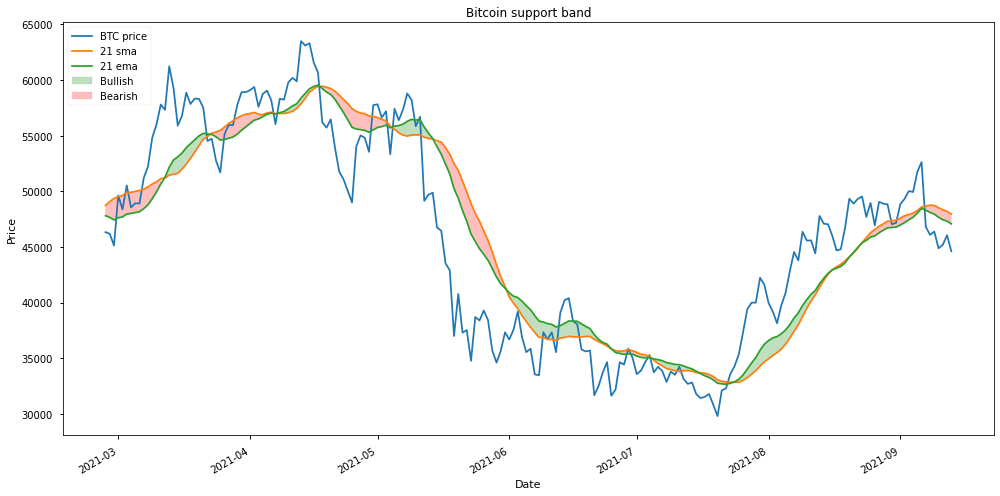

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn-notebook')
plt.figure(figsize=(14,7))

df['Date'] = pd.to_datetime(df['Date'])
# df.sort_values(df['Date'], inplace=True)

days = 200
dates = df['Date'].tail(days)
price = df['Close'].tail(days)
sma21 = df['sma21'].tail(days)
ema21 = df['ema21'].tail(days)

# df['sma21'] = pta.sma(df["Close"], length=21)
# df['ema21'] = pta.ema(df["Close"], length=21)
# df['sma50'] = pta.sma(df["Close"], length=50)
# df['sma100'] = pta.sma(df["Close"], length=100)
# df['sma200'] = pta.sma(df["Close"], length=200)
# df['wsma20'] = pta.sma(df["Close"], length=140)
# df['wsma200'] = pta.sma(df["Close"], length=1400)

# Adding lines
plt.plot_date(dates, price, linestyle='solid', marker=None, label='BTC price')
plt.plot(dates, sma21, label='21 sma')
plt.plot(dates, ema21, label='21 ema')

# Create log chart
# plt.yscale('log')

plt.gcf().autofmt_xdate()

plt.fill_between(dates, ema21, sma21, 
                 where=(ema21 >= sma21), color='green', alpha=0.25,
                label='Bullish')
plt.fill_between(dates, ema21, sma21, 
                 where=(ema21 <= sma21), color='red', alpha=0.25,
                label='Bearish')

plt.title('Bitcoin support band')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

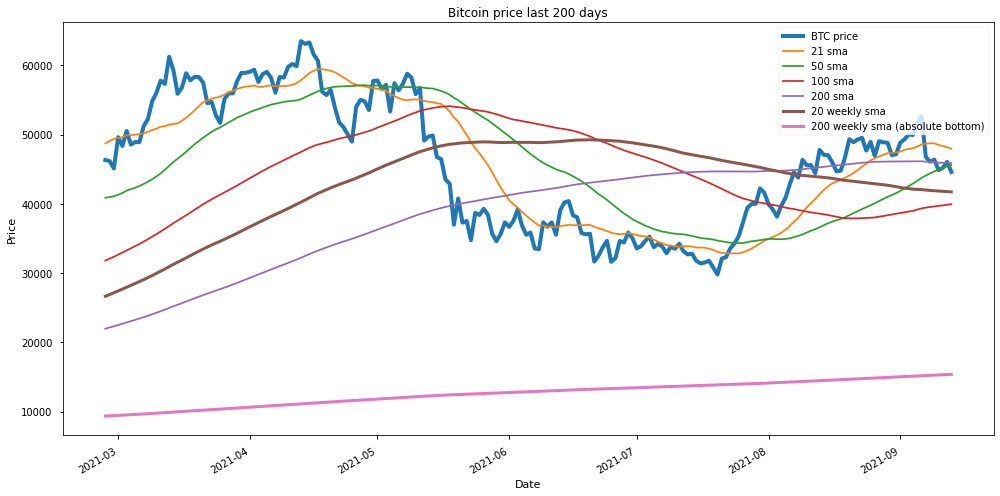

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn-notebook')
plt.figure(figsize=(14,7))

df['Date'] = pd.to_datetime(df['Date'])
# df.sort_values(df['Date'], inplace=True)

days = 200
dates = df['Date'].tail(days)
price = df['Close'].tail(days)
sma21 = df['sma21'].tail(days)
sma50 = df['sma50'].tail(days)
sma100 = df['sma100'].tail(days)
sma200 = df['sma200'].tail(days)
wsma20 = df['wsma20'].tail(days)
wsma200 = df['wsma200'].tail(days)

# Adding lines
plt.plot_date(dates, price, linestyle='solid', linewidth=4, marker=None, label='BTC price')
plt.plot(dates, sma21, label='21 sma')
plt.plot(dates, sma50, label='50 sma')
plt.plot(dates, sma100, label='100 sma')
plt.plot(dates, sma200, label='200 sma')
plt.plot(dates, wsma20, linewidth=3, label='20 weekly sma')
plt.plot(dates, wsma200, linewidth=3, label='200 weekly sma (absolute bottom)')


plt.gcf().autofmt_xdate()

plt.title('Bitcoin price last 200 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Mayer Multiple and Pi cycle top


    Mayer multiple (200 SMA * 2,4)
    Pi Cycle top (111 SMA > (2 * 350 SMA))
    Pi Cycle bottom


In [ ]:
# Mayer multiple
df['mayer'] = (pta.sma(df["Close"], length=200) * 2.4)
# Pi Cycle averages
df['picyclesma111'] = pta.sma(df["Close"], length=111)
df['picyclesma350'] = pta.sma(df["Close"], length=350) * 2

df

,Date,Open,High,Low,Close,Adj Close,Volume,sma21,ema21,sma50,sma100,sma200,wsma20,wsma200,y2lowsma,y2highsma,mayer,picyclesma111,picyclesma350
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,2021-09-09,45774.742188,47261.949219,45669.738281,46391.421875,46391.421875,38672657013,48740.943080,47955.153434,44699.063516,39652.692422,46001.664199,41907.354911,15284.706857,22236.591710,111182.958550,110403.994078,39391.219911,73409.773934
2546,2021-09-10,46396.664062,47031.742188,44344.484375,44883.910156,44883.910156,39154666597,48528.787574,47675.949500,44950.479609,39725.779727,45955.047148,41862.999609,15311.750536,22283.669320,111418.346599,110292.113156,39457.411599,73606.033650
2547,2021-09-11,44869.839844,45969.292969,44818.265625,45201.457031,45201.457031,34499835245,48352.404948,47450.995639,45182.877734,39785.706641,45936.932305,41828.360965,15338.934162,22331.286006,111656.430029,110248.637531,39551.383446,73805.894180
2548,2021-09-12,45206.628906,46364.878906,44790.460938,46063.269531,46063.269531,27881980161,48197.243862,47324.838720,45418.294219,39877.395273,45918.721992,41807.353934,15366.508148,22380.228875,111901.144377,110204.932781,39617.665329,74007.709727


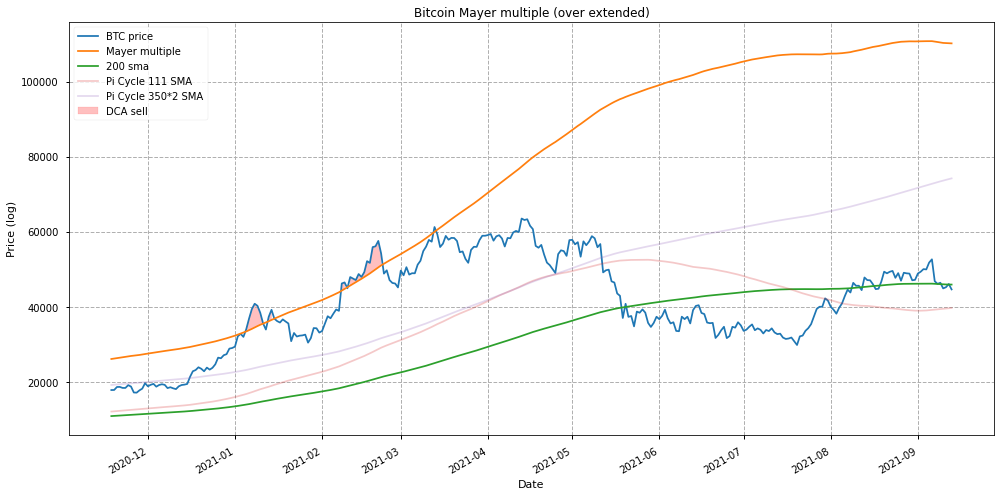

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn-notebook')
plt.figure(figsize=(14,7))
plt.grid(linestyle='--', linewidth=1)

df['Date'] = pd.to_datetime(df['Date'])
# df.sort_values(df['Date'], inplace=True)

days = 300
dates = df['Date'].tail(days)
price = df['Close'].tail(days)
mayer = df['mayer'].tail(days)
sma200 = df['sma200'].tail(days)
pi111sma = df['picyclesma111'].tail(days)
pi350sma = df['picyclesma350'].tail(days)


# Adding lines
plt.plot_date(dates, price, linestyle='solid', marker=None, label='BTC price')
plt.plot(dates, mayer, label='Mayer multiple')
plt.plot(dates, sma200, label='200 sma')
plt.plot(dates, pi111sma, label='Pi Cycle 111 SMA', alpha=0.25)
plt.plot(dates, pi350sma, label='Pi Cycle 350*2 SMA', alpha=0.25)

# Create log chart
# plt.yscale('log')

plt.gcf().autofmt_xdate()

# Fill when price goes above/below MA's
# Fill the area between the py_salaries line and the dev_salaries line
# give different colors in each area
plt.fill_between(dates, price, mayer, 
                 where=(price >= mayer), color='red', alpha=0.25,
                label='DCA sell')
# plt.fill_between(dates, price, y2lowsma, 
#                  where=(price <= y2lowsma), color='green', alpha=0.25,
#                 label='DCA buy')

plt.title('Bitcoin Mayer multiple (over extended)')
plt.xlabel('Date')
plt.ylabel('Price (log)')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()